In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tf-explain

In [ ]:
# 모델 로드
import os
import glob
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity
from tensorflow.keras.preprocessing.image import load_img, img_to_array

model = keras.models.load_model("/content/drive/MyDrive/aihub/best_model/crop3-034-0.0432.hdf5")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 256, 256, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 256, 256, 3)       0         
 )                                                               
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               838886

['177143_167494_2_1330_121.jpg', '178610_166780_2_0062_160.jpg', '176067_16370_2_0450_94.jpg', '175319_176066_2_0110_373.jpg', '179032_175277_2_0042_202.jpg']
6/6 [==============================] - 32s 5s/step


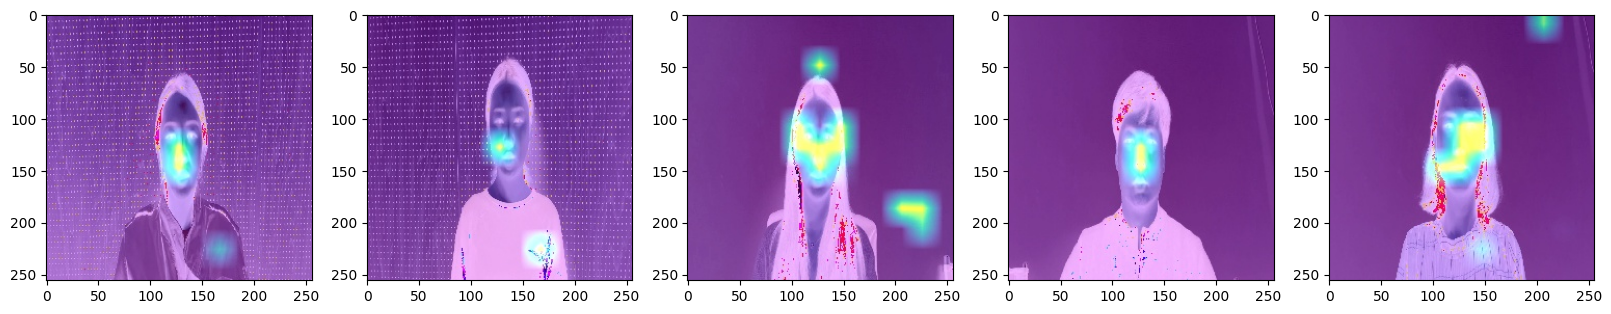

In [ ]:
# 상반신 이미지 patch_size = 20
folder_path = '/content/drive/MyDrive/deepfake/Fake_img1/'
file_list = os.listdir(folder_path)
input_list = random.sample(file_list, min(5, len(file_list)))
print(input_list)
imagenet_index = [0,0,0,0,0]

explainer = OcclusionSensitivity()
images_occ = []
patch_size = 20

for l, i in zip(input_list, imagenet_index):
  img = load_img(folder_path+f'{l}', target_size=(256,256))
  img = img_to_array(img)
  data = ([img], None)
  try:
    grid = explainer.explain(data, model, int(i), patch_size)
    explainer.save(grid, ".", '/content/drive/MyDrive/img/new_img/{}_occ1.jpg'.format(l))
  except Exception as e:
    print("오류 발생:", e)

images_occ = []
for img_path in glob.glob('/content/drive/MyDrive/img/new_img/*_occ1.jpg'):
    images_occ.append(mpimg.imread(img_path))

plt.figure(figsize=(20,20))
for i, image in enumerate(images_occ[0:5]):
    plt.subplot(5,5,i+1)
    plt.imshow(image)

['179140_39549_2_0840_126.jpg_crop.jpg', '181612_19733_2_1280_341.jpg_crop.jpg', '178360_169860_2_0320_385.jpg_crop.jpg', '176343_175221_2_1370_285.jpg_crop.jpg', '178175_176177_2_0083_344.jpg_crop.jpg']
2/2 [==============================] - 7s 785ms/step


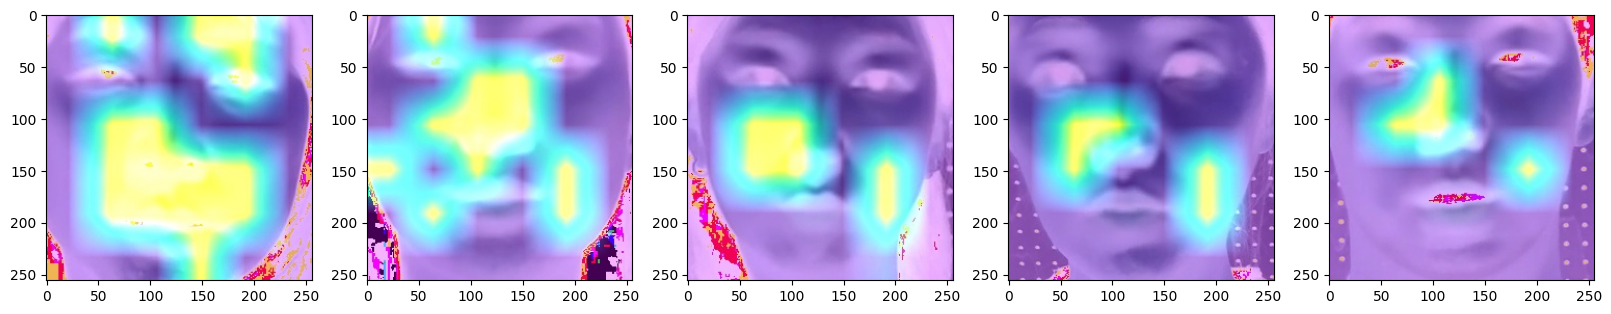

In [ ]:
# 크롭 이미지 patch_size = 50
folder_path = '/content/drive/MyDrive/crop/Fake_img1/'
file_list = os.listdir(folder_path)
input_list = random.sample(file_list, min(5, len(file_list)))
print(input_list)
imagenet_index = [0,0,0,0,0]

explainer = OcclusionSensitivity()
images_occ = []
patch_size = 50

for l, i in zip(input_list, imagenet_index):
  img = load_img(folder_path+f'{l}', target_size=(256,256))
  img = img_to_array(img)
  data = ([img], None)
  try:
    grid = explainer.explain(data, model, int(i), patch_size)
    explainer.save(grid, ".", '/content/drive/MyDrive/img/new_img/{}_mode1.jpg'.format(l))
  except Exception as e:
    print("오류 발생:", e)

images_occ = []
for img_path in glob.glob('/content/drive/MyDrive/img//new_img/*_mode1.jpg'):
    images_occ.append(mpimg.imread(img_path))

plt.figure(figsize=(20,20))
for i, image in enumerate(images_occ[0:5]):
    plt.subplot(5,5,i+1)
    plt.imshow(image)